In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_context('poster')
sns.set_style('dark')
sns.set(rc={"figure.figsize":(12, 5)})

In [3]:
store = pd.read_csv("store.csv")

In [4]:
store.head(3)

,StoreID,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
0,1,type3,Essentials,0,NaN,NaN,1270.0,9.0,2008.0
1,2,type1,Essentials,1,13.0,2010.0,570.0,11.0,2007.0
2,3,type1,Essentials,1,14.0,2011.0,14130.0,12.0,2006.0


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StoreID              1115 non-null   int64  
 1   LocalityType         1115 non-null   object 
 2   ProductMix           1115 non-null   object 
 3   PromoCont            1115 non-null   int64  
 4   PromoContStartWeek   571 non-null    float64
 5   PromoContStartYear   571 non-null    float64
 6   CompetitionDistance  1112 non-null   float64
 7   CompetitionMonth     761 non-null    float64
 8   CompetitionYear      761 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 78.5+ KB


<AxesSubplot:>

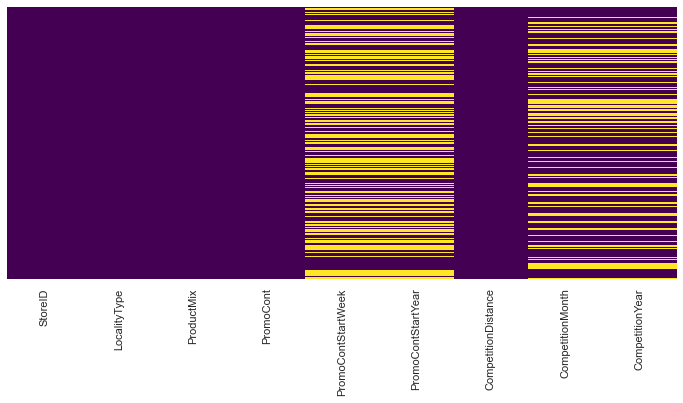

In [6]:
sns.heatmap(store.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [7]:
store.shape[0]

1115

In [8]:
store[(store['PromoCont']== 0) & (store['PromoContStartWeek'].isnull())].shape[0]

544

In [9]:
store[(store['PromoCont']== 0) & (store['PromoContStartYear'].isnull())].shape[0]

544

#### The number of missing values in PromoContStartWeek and PromoContStartWeek is equals to the number of values equals to 0 in PromoCont , i.e. 544 . Hence, replace all NAN with 0. 

In [10]:
store['PromoContStartWeek'].fillna(value=0,inplace=True)

In [11]:
store['PromoContStartYear'].fillna(value=0,inplace=True)

<AxesSubplot:>

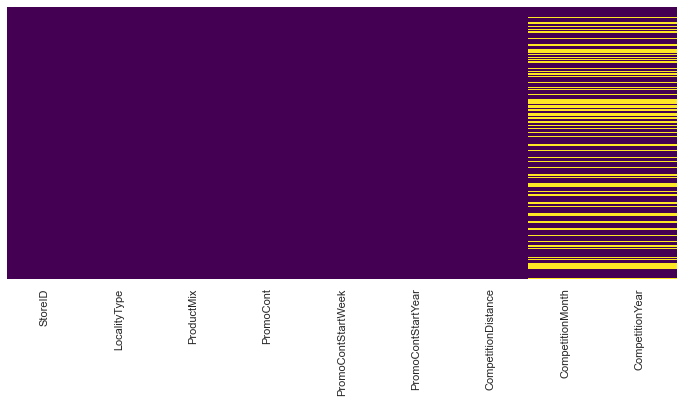

In [12]:
sns.heatmap(store.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [13]:
store[(store['CompetitionMonth'].isna()) & (store['CompetitionYear'].isna())].shape[0]

354

In [14]:
store.head(2)

,StoreID,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
0,1,type3,Essentials,0,0.0,0.0,1270.0,9.0,2008.0
1,2,type1,Essentials,1,13.0,2010.0,570.0,11.0,2007.0


In [15]:
store.describe()

,StoreID,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1112.000000,761.000000,761.000000
mean,558.00000,0.512108,12.083408,1030.239462,5404.901079,7.224704,2008.668857
std,322.01708,0.500078,15.542241,1006.038782,7663.174720,3.212348,6.195983
min,1.00000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000
25%,279.50000,0.000000,0.000000,0.000000,717.500000,4.000000,2006.000000
50%,558.00000,1.000000,1.000000,2009.000000,2325.000000,8.000000,2010.000000
75%,836.50000,1.000000,22.000000,2012.000000,6882.500000,10.000000,2013.000000
max,1115.00000,1.000000,50.000000,2015.000000,75860.000000,12.000000,2015.000000


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionDistance', ylabel='CompetitionMonth'>

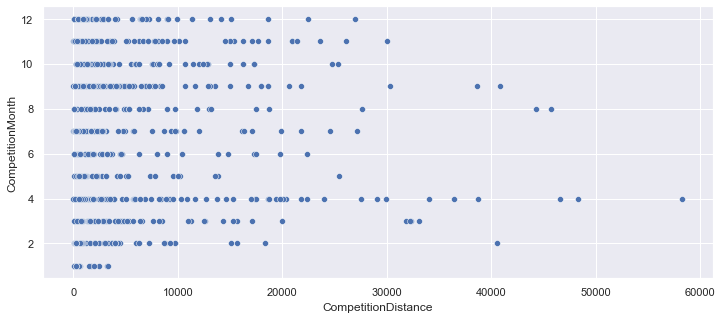

In [16]:
sns.scatterplot('CompetitionDistance','CompetitionMonth',data=store)

In [17]:
store['LocalityType'].unique()

array(['type3', 'type1', 'type4', 'type2'], dtype=object)

In [18]:
store[store['CompetitionMonth'].isnull()]

,StoreID,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
11,12,type1,LargeVariety,1,13.0,2010.0,1070.0,NaN,NaN
12,13,type4,Essentials,1,45.0,2009.0,310.0,NaN,NaN
15,16,type1,LargeVariety,0,0.0,0.0,3270.0,NaN,NaN
18,19,type1,LargeVariety,1,22.0,2011.0,3240.0,NaN,NaN
21,22,type1,Essentials,1,22.0,2012.0,1040.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1095,1096,type1,LargeVariety,1,10.0,2014.0,1130.0,NaN,NaN
1099,1100,type1,Essentials,1,14.0,2011.0,540.0,NaN,NaN
1112,1113,type1,LargeVariety,0,0.0,0.0,9260.0,NaN,NaN
1113,1114,type1,LargeVariety,0,0.0,0.0,870.0,NaN,NaN


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionMonth', ylabel='Density'>

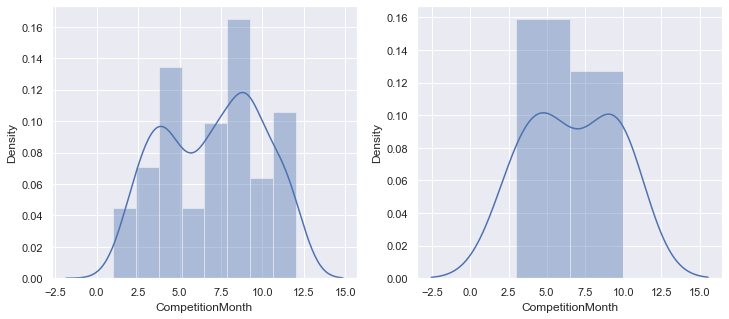

In [19]:
plt.subplot(1,2,1)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type1')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())

plt.subplot(1,2,2)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type2')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompetitionMonth', ylabel='Density'>

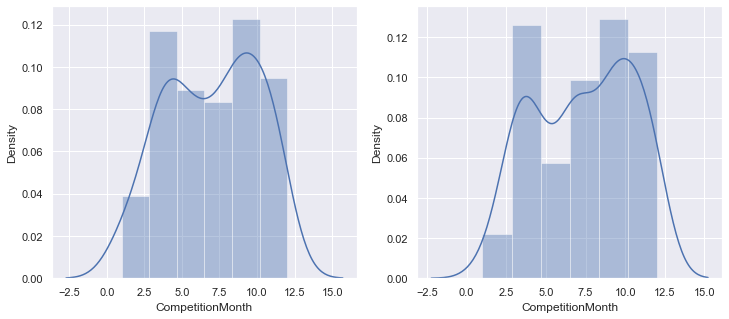

In [20]:
plt.subplot(1,2,1)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type3')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())
plt.subplot(1,2,2)
sns.distplot(store[(store['CompetitionMonth'].isnull()==False) & (store['LocalityType']=='type4')].groupby(['LocalityType','CompetitionDistance'])['CompetitionMonth'].mean())


In [21]:
a = store[store['CompetitionMonth'].isnull()]['ProductMix']

In [22]:
a.value_counts()

LargeVariety      193
Essentials        155
EssentialsPlus      6
Name: ProductMix, dtype: int64

<AxesSubplot:ylabel='Frequency'>

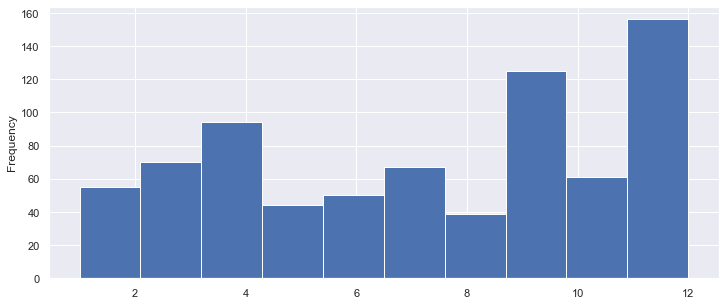

In [23]:
store['CompetitionMonth'].plot.hist()

In [24]:
store[store['CompetitionMonth'].isnull()== True].groupby('LocalityType').count()

,StoreID,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
LocalityType,,,,,,,,
type1,176,176,176,176,176,175,0,0
type2,8,8,8,8,8,8,0,0
type3,41,41,41,41,41,41,0,0
type4,129,129,129,129,129,127,0,0


In [25]:
'''def impute_C_Month(col):
    CM=col[0]
    type=col[1]
    if col[0].isnull():
        if col[1]=='type1':
            return 'a'
        elif col[1]=='type2':
            return 'b'
        else : return 'c'
    else: col[0]==col[0]      '''

"def impute_C_Month(col):\n    CM=col[0]\n    type=col[1]\n    if col[0].isnull():\n        if col[1]=='type1':\n            return 'a'\n        elif col[1]=='type2':\n            return 'b'\n        else : return 'c'\n    else: col[0]==col[0]      "

In [26]:
# fix the CompetitionMonth 
median_CM = store.groupby(['LocalityType'])['CompetitionMonth'].median()
display(median_CM)

LocalityType
type1    7.5
type2    6.0
type3    7.0
type4    8.0
Name: CompetitionMonth, dtype: float64

In [27]:
def replace_CM_(row):
    if pd.isnull(row['CompetitionMonth']):
        return median_CM[row['LocalityType']]
    else:
        return row['CompetitionMonth']

In [28]:
store['CompetitionMonth'] = store.apply(replace_CM_,axis = 1)

In [29]:
# fix the CompetitionYear
median_CY = store.groupby(['LocalityType'])['CompetitionYear'].median()
display(median_CY)
display(median_CY.shape)


LocalityType
type1    2010.0
type2    2008.0
type3    2009.0
type4    2010.0
Name: CompetitionYear, dtype: float64

(4,)

In [30]:
def replace_CY_(row):
    if pd.isnull(row['CompetitionYear']):
        return median_CY[row['LocalityType']]
    else:
        return row['CompetitionYear']

In [31]:
store['CompetitionYear'] = store.apply(replace_CY_,axis = 1)


In [32]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StoreID              1115 non-null   int64  
 1   LocalityType         1115 non-null   object 
 2   ProductMix           1115 non-null   object 
 3   PromoCont            1115 non-null   int64  
 4   PromoContStartWeek   1115 non-null   float64
 5   PromoContStartYear   1115 non-null   float64
 6   CompetitionDistance  1112 non-null   float64
 7   CompetitionMonth     1115 non-null   float64
 8   CompetitionYear      1115 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 78.5+ KB


In [33]:
store.isnull().sum()

StoreID                0
LocalityType           0
ProductMix             0
PromoCont              0
PromoContStartWeek     0
PromoContStartYear     0
CompetitionDistance    3
CompetitionMonth       0
CompetitionYear        0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

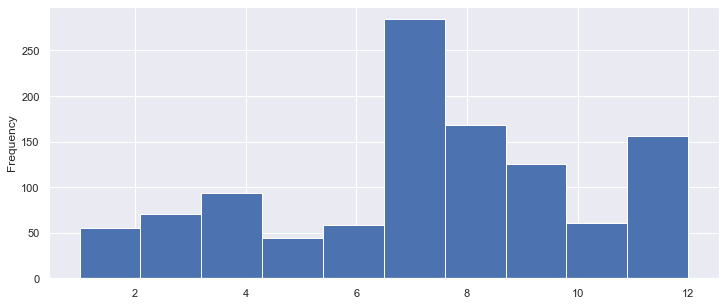

In [34]:
store['CompetitionMonth'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

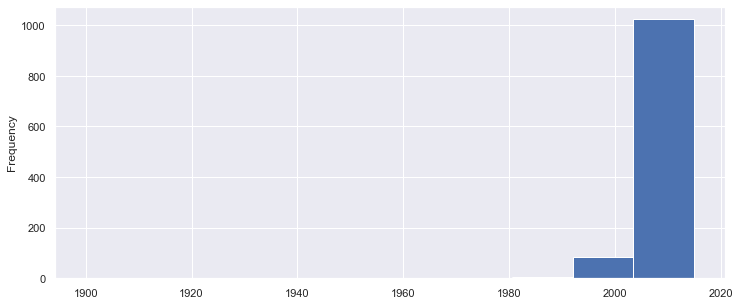

In [35]:
store['CompetitionYear'].plot.hist()

In [36]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StoreID              1115 non-null   int64  
 1   LocalityType         1115 non-null   object 
 2   ProductMix           1115 non-null   object 
 3   PromoCont            1115 non-null   int64  
 4   PromoContStartWeek   1115 non-null   float64
 5   PromoContStartYear   1115 non-null   float64
 6   CompetitionDistance  1112 non-null   float64
 7   CompetitionMonth     1115 non-null   float64
 8   CompetitionYear      1115 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 78.5+ KB


In [37]:
## store.dropna(subset=['CompetitionDistance'],inplace=True)

In [38]:
# store.isnull().sum()

In [39]:
cop_store = store.copy()

C:\Users\shubh\store-sales prediction\train_data.py:25: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  train_store = pd.read_csv("train.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949194 entries, 0 to 949193
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   StoreID       949194 non-null  int64 
 1   DOW           949194 non-null  int64 
 2   Date          949194 non-null  object
 3   Sales         949194 non-null  int64 
 4   StoreOpen     949194 non-null  int64 
 5   PromoFlag     949194 non-null  int64 
 6   HolidayFlag   949194 non-null  object
 7   SchUnivClose  949194 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 57.9+ MB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949194 entries, 0 to 949193
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   StoreID       949194 non-null  int64         
 1   DOW           949194 non-null  int64         
 2   Date          949194 non-null  datetime64[ns]
 3   Sales         949194 non-null  int64         
 4   StoreOpen     949194 non-null  int64         
 5   PromoFlag     949194 non-null  int64         
 6   HolidayFlag   949194 non-null  object        
 7   SchUnivClose  949194 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 57.9+ MB


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


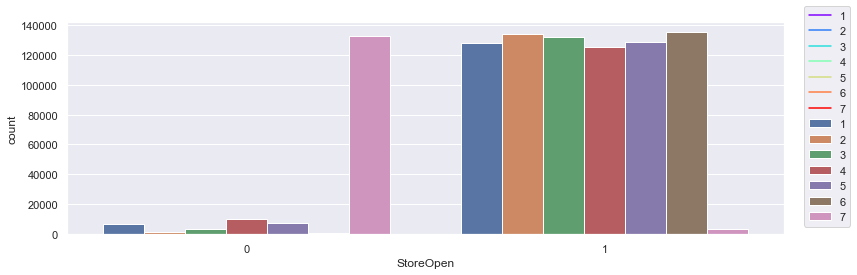

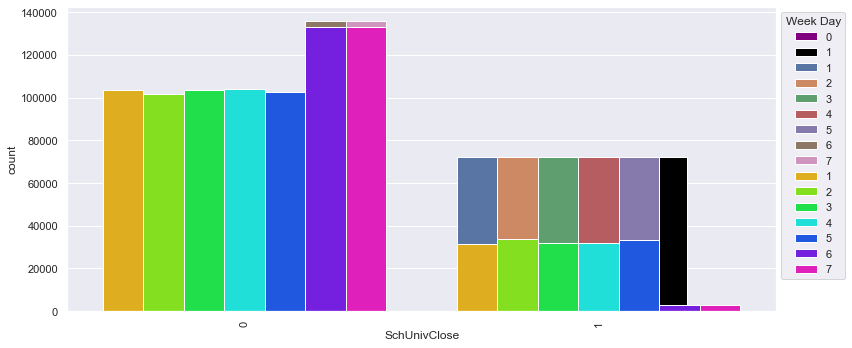

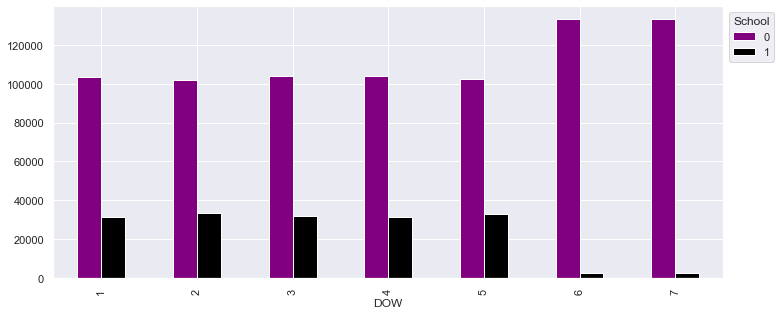

In [40]:
import train_data

In [41]:
train = train_data.train_store

In [42]:
train

,StoreID,DOW,Date,Sales,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose
0,1,7,2015-05-31,0,0,0,0,0
1,2,7,2015-05-31,0,0,0,0,0
2,3,7,2015-05-31,0,0,0,0,0
3,4,7,2015-05-31,0,0,0,0,0
4,5,7,2015-05-31,0,0,0,0,0
...,...,...,...,...,...,...,...,...
949189,1111,2,2013-01-01,0,0,0,h1,1
949190,1112,2,2013-01-01,0,0,0,h1,1
949191,1113,2,2013-01-01,0,0,0,h1,1
949192,1114,2,2013-01-01,0,0,0,h1,1


In [43]:
train.columns

Index(['StoreID', 'DOW', 'Date', 'Sales', 'StoreOpen', 'PromoFlag',
       'HolidayFlag', 'SchUnivClose'],
      dtype='object')

In [44]:
store.columns

Index(['StoreID', 'LocalityType', 'ProductMix', 'PromoCont',
       'PromoContStartWeek', 'PromoContStartYear', 'CompetitionDistance',
       'CompetitionMonth', 'CompetitionYear'],
      dtype='object')

In [45]:
store['StoreID'].nunique()

1115

In [46]:
train['StoreID'].nunique()

1115

In [47]:
store_merged_train = pd.merge(train, store, on='StoreID', how='left')

In [48]:
store_merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreID              949194 non-null  int64         
 1   DOW                  949194 non-null  int64         
 2   Date                 949194 non-null  datetime64[ns]
 3   Sales                949194 non-null  int64         
 4   StoreOpen            949194 non-null  int64         
 5   PromoFlag            949194 non-null  int64         
 6   HolidayFlag          949194 non-null  object        
 7   SchUnivClose         949194 non-null  int64         
 8   LocalityType         949194 non-null  object        
 9   ProductMix           949194 non-null  object        
 10  PromoCont            949194 non-null  int64         
 11  PromoContStartWeek   949194 non-null  float64       
 12  PromoContStartYear   949194 non-null  float64       
 13  CompetitionDis

In [49]:
store_merged_train[store_merged_train['CompetitionDistance'].isnull()]['StoreID'].unique()

array([291, 622, 879], dtype=int64)

In [50]:
store_merged_train[store_merged_train['CompetitionDistance'].isnull()].groupby('StoreID')['StoreID'].count()

StoreID
291    881
622    881
879    697
Name: StoreID, dtype: int64

In [51]:
store_merged_train[store_merged_train['CompetitionDistance'].isnull()]['LocalityType']

290       type4
621       type1
878       type4
1405      type4
1736      type1
          ...  
947586    type1
947843    type4
948370    type4
948701    type1
948958    type4
Name: LocalityType, Length: 2459, dtype: object

In [52]:
Mean_distance=[]
#def impute_distance():
for Loc_id in {'type1','type2','type3','type4'}:
    distance=round(store_merged_train.CompetitionDistance[store_merged_train['LocalityType']==Loc_id].mean(),2)
    print(Loc_id,"\n",distance)
  

type3 
 3516.29
type4 
 6963.28
type1 
 5169.55
type2 
 1066.44


In [53]:
# fix the CompetitionDistance
mean_CD = store.groupby(['LocalityType'])['CompetitionDistance'].mean()
display(mean_CD)

LocalityType
type1    5123.061564
type2    1060.588235
type3    3522.567568
type4    6913.063584
Name: CompetitionDistance, dtype: float64

In [54]:
def replace_CD_(row):
    if pd.isnull(row['CompetitionDistance']):
        return mean_CD[row['LocalityType']]
    else:
        return row['CompetitionDistance']

In [55]:
store_merged_train['CompetitionDistance']= store_merged_train.apply(replace_CD_,axis = 1)

In [56]:
store_merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreID              949194 non-null  int64         
 1   DOW                  949194 non-null  int64         
 2   Date                 949194 non-null  datetime64[ns]
 3   Sales                949194 non-null  int64         
 4   StoreOpen            949194 non-null  int64         
 5   PromoFlag            949194 non-null  int64         
 6   HolidayFlag          949194 non-null  object        
 7   SchUnivClose         949194 non-null  int64         
 8   LocalityType         949194 non-null  object        
 9   ProductMix           949194 non-null  object        
 10  PromoCont            949194 non-null  int64         
 11  PromoContStartWeek   949194 non-null  float64       
 12  PromoContStartYear   949194 non-null  float64       
 13  CompetitionDis

<AxesSubplot:>

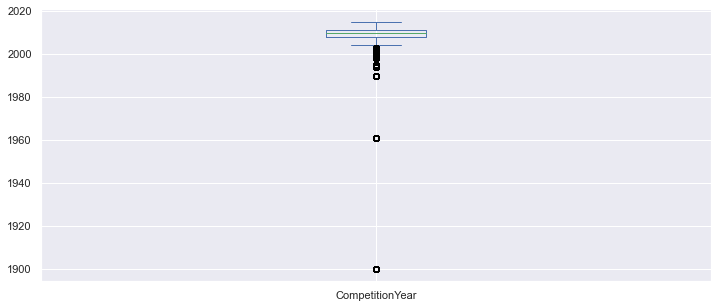

In [57]:
store_merged_train['CompetitionYear'].plot.box()

# Pre-processing of Train - dataset 
#### Creating dummy variable 

In [58]:
train_data = store_merged_train.copy()

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreID              949194 non-null  int64         
 1   DOW                  949194 non-null  int64         
 2   Date                 949194 non-null  datetime64[ns]
 3   Sales                949194 non-null  int64         
 4   StoreOpen            949194 non-null  int64         
 5   PromoFlag            949194 non-null  int64         
 6   HolidayFlag          949194 non-null  object        
 7   SchUnivClose         949194 non-null  int64         
 8   LocalityType         949194 non-null  object        
 9   ProductMix           949194 non-null  object        
 10  PromoCont            949194 non-null  int64         
 11  PromoContStartWeek   949194 non-null  float64       
 12  PromoContStartYear   949194 non-null  float64       
 13  CompetitionDis

In [60]:
## pandas.DataFrame.loc[condition, column_label] = new_value
train_data.loc[train_data.HolidayFlag=='0','HolidayFlag']=0

In [61]:
train_data.loc[train_data["HolidayFlag"]=="0","HolidayFlag"]=0
train_data.loc[train_data["HolidayFlag"]=="h1","HolidayFlag"]=1
train_data.loc[train_data["HolidayFlag"]=="h2","HolidayFlag"]=2
train_data.loc[train_data["HolidayFlag"]=="h3","HolidayFlag"]=3
train_data["HolidayFlag"]=train_data["HolidayFlag"].astype(int,copy=False)

In [62]:
train_data['HolidayFlag'].unique()

array([0, 1, 2, 3])

In [63]:
#Automize the factor process
def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value # factor starts at "start_value".
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [64]:
factor_to_integer(train_data,"LocalityType")

levels : [0 1 2 3] ; data type : int32


In [65]:
factor_to_integer(train_data,"ProductMix")

levels : [0 1 2] ; data type : int32


In [66]:
train_data['ProductMix'].unique()

array([0, 1, 2])

In [67]:
#train_data['HolidayFlag']=train_data['HolidayFlag'].replace(['0'],[0])

In [68]:
#dummies_LocalityType= pd.get_dummies(data = train_data['LocalityType'],drop_first=True,prefix = 'LocalityType')

In [69]:
#dummies_ProductMix= pd.get_dummies(data = train_data['ProductMix'],drop_first=True,prefix = 'ProductMix')

In [70]:
#train_data= pd.concat([train_data,dummies_holiday,dummies_LocalityType,dummies_ProductMix],axis=1)

In [71]:
#train_data.drop(['LocalityType','ProductMix','HolidayFlag'],axis=1,inplace=True)

In [72]:
train_data['Date']

0        2015-05-31
1        2015-05-31
2        2015-05-31
3        2015-05-31
4        2015-05-31
            ...    
949189   2013-01-01
949190   2013-01-01
949191   2013-01-01
949192   2013-01-01
949193   2013-01-01
Name: Date, Length: 949194, dtype: datetime64[ns]

In [73]:
train_data["Year"]=pd.DatetimeIndex(train_data["Date"]).year
train_data["Month"]=pd.DatetimeIndex(train_data["Date"]).month

In [74]:
train_data['Day']= pd.DatetimeIndex(train_data["Date"]).day

In [75]:
train_data.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreID              949194 non-null  int64         
 1   DOW                  949194 non-null  int64         
 2   Date                 949194 non-null  datetime64[ns]
 3   Sales                949194 non-null  int64         
 4   StoreOpen            949194 non-null  int64         
 5   PromoFlag            949194 non-null  int64         
 6   HolidayFlag          949194 non-null  int32         
 7   SchUnivClose         949194 non-null  int64         
 8   LocalityType         949194 non-null  int32         
 9   ProductMix           949194 non-null  int32         
 10  PromoCont            949194 non-null  int64         
 11  PromoContStartWeek   949194 non-null  float64       
 12  PromoContStartYear   949194 non-null  float64       
 13  CompetitionDis

In [76]:
train_data = train_data.astype({'HolidayFlag': 'int64', 
                                'ProductMix':'int64','LocalityType':'int64'})

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   StoreID              949194 non-null  int64         
 1   DOW                  949194 non-null  int64         
 2   Date                 949194 non-null  datetime64[ns]
 3   Sales                949194 non-null  int64         
 4   StoreOpen            949194 non-null  int64         
 5   PromoFlag            949194 non-null  int64         
 6   HolidayFlag          949194 non-null  int64         
 7   SchUnivClose         949194 non-null  int64         
 8   LocalityType         949194 non-null  int64         
 9   ProductMix           949194 non-null  int64         
 10  PromoCont            949194 non-null  int64         
 11  PromoContStartWeek   949194 non-null  float64       
 12  PromoContStartYear   949194 non-null  float64       
 13  CompetitionDis

In [78]:
train_data.drop('Date',axis=1,inplace=True)

In [79]:
len(train_data.columns)

18

In [80]:
train_data['Year']=train_data["Year"].max()-train_data["Year"]

In [81]:
len(train_data.columns)

18

In [82]:
train_data.head(2)

,StoreID,DOW,Sales,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear,Year,Month,Day
0,1,7,0,0,0,0,0,0,0,0,0.0,0.0,1270.0,9.0,2008.0,0,5,31
1,2,7,0,0,0,0,0,1,0,1,13.0,2010.0,570.0,11.0,2007.0,0,5,31


### Preprocessing of test -dataset 

In [83]:
test= pd.read_csv('test.csv')

In [84]:
test.head(2)

,Id,StoreID,DOW,Date,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose
0,1,1,5,31-07-2015,1,1,0,1
1,2,2,5,31-07-2015,1,1,0,1


In [85]:
store_merged_test = pd.merge(test, store, on='StoreID', how='left')

In [86]:
store_merged_test.head(2)

,Id,StoreID,DOW,Date,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
0,1,1,5,31-07-2015,1,1,0,1,type3,Essentials,0,0.0,0.0,1270.0,9.0,2008.0
1,2,2,5,31-07-2015,1,1,0,1,type1,Essentials,1,13.0,2010.0,570.0,11.0,2007.0


In [87]:
factor_to_integer(store_merged_test,"ProductMix")

levels : [0 1 2] ; data type : int32


In [88]:
factor_to_integer(store_merged_test,"HolidayFlag")

levels : [0 1] ; data type : int32


In [89]:
store_merged_test['Date'] = pd.to_datetime(store_merged_test['Date'],format='%d-%m-%Y')

In [90]:
store_merged_test["Year"]=pd.DatetimeIndex(store_merged_test["Date"]).year
store_merged_test["Month"]=pd.DatetimeIndex(store_merged_test["Date"]).month
store_merged_test["Day"]= pd.DatetimeIndex(store_merged_test["Date"]).day

In [91]:
store_merged_test['Year']=store_merged_test["Year"].max()-store_merged_test["Year"]

In [92]:
store_merged_test.drop('Date',axis=1,inplace=True)

In [93]:
# fix the CompetitionDistance
mean_CD = store.groupby(['LocalityType'])['CompetitionDistance'].mean()
display(mean_CD)

LocalityType
type1    5123.061564
type2    1060.588235
type3    3522.567568
type4    6913.063584
Name: CompetitionDistance, dtype: float64

In [94]:
def replace_CD_(row):
    if pd.isnull(row['CompetitionDistance']):
        return mean_CD[row['LocalityType']]
    else:
        return row['CompetitionDistance']

In [95]:
store_merged_test['CompetitionDistance']= store_merged_test.apply(replace_CD_,axis = 1)

In [96]:
factor_to_integer(store_merged_test,"LocalityType")

levels : [0 1 2 3] ; data type : int32


In [123]:
store_merged_test.drop('Id',axis=1,inplace=True)

In [98]:
store_merged_test.isnull().sum()

Id                     0
StoreID                0
DOW                    0
StoreOpen              0
PromoFlag              0
HolidayFlag            0
SchUnivClose           0
LocalityType           0
ProductMix             0
PromoCont              0
PromoContStartWeek     0
PromoContStartYear     0
CompetitionDistance    0
CompetitionMonth       0
CompetitionYear        0
Year                   0
Month                  0
Day                    0
dtype: int64

In [99]:
len(store_merged_test.columns)

18

In [100]:
train_data.head(2);store_merged_test.head(2)

,Id,StoreID,DOW,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear,Year,Month,Day
0,1,1,5,1,1,0,1,0,0,0,0.0,0.0,1270.0,9.0,2008.0,0,7,31
1,2,2,5,1,1,0,1,1,0,1,13.0,2010.0,570.0,11.0,2007.0,0,7,31


## Separating train and test data from train_data dataset


In [104]:
import sklearn.model_selection as model_selection
X=train_data.drop("Sales",axis=1)
y=train_data["Sales"]

In [105]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,random_state=42)

In [106]:
print("X_train\t",X_train.shape),print("X_test\t",X_test.shape),print("y_train\t",y_train.shape),print("y_test\t",y_test.shape)

X_train	 (711895, 17)
X_test	 (237299, 17)
y_train	 (711895,)
y_test	 (237299,)


(None, None, None, None)

# Model building using pipeline

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [108]:
pipeline_lr=Pipeline([
    ('scale1',StandardScaler()),
    ('pca1',PCA(n_components=2)),
    ('lr_regress',LinearRegression())
])

In [109]:
pipeline_dt=Pipeline([
    ('scale2',StandardScaler()),
    ('pca2',PCA(n_components=2)),
    ('DT_regress',DecisionTreeRegressor())
])

In [148]:
pipeline_rf=Pipeline([
    ('scale3',StandardScaler()),
    ('pca3',PCA(n_components=2)),
    ('RF_regress',RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=20,min_samples_leaf=5,verbose=2))
])

In [111]:
pipe_dict={0:'linearRegression',1:'Decision Tree',2:'Random Forest'}

In [112]:
pipeline =[pipeline_lr,pipeline_dt,pipeline_rf]

In [113]:
for pipe in pipeline:
    pipe.fit(X_train,y_train)

In [114]:
for i , model in enumerate(pipeline):
    print("{} test accuracy:{}".format(pipe_dict[i],model.score(X_train,y_train)))

linearRegression test accuracy:0.4817817921017947
Decision Tree test accuracy:0.16310205597953897
Random Forest test accuracy:0.5394098036067885


In [116]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline=" "

In [117]:
for i , model in enumerate(pipeline):
    if model.score(X_test,y_test) > best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i

In [118]:
print('regressor with best accuracy:{}'.format(pipe_dict[best_classifier]))

regressor with best accuracy:Random Forest


## Model Testing on Test Data 

In [140]:
store_merged_test.columns

Index(['StoreID', 'DOW', 'StoreOpen', 'PromoFlag', 'HolidayFlag',
       'SchUnivClose', 'LocalityType', 'ProductMix', 'PromoCont',
       'PromoContStartWeek', 'PromoContStartYear', 'CompetitionDistance',
       'CompetitionMonth', 'CompetitionYear', 'Year', 'Month', 'Day',
       'Predict'],
      dtype='object')

In [149]:
store_merged_test.drop('Predict',axis=1,inplace=True)

In [150]:
pipeline_rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100building tree 9 of 100

building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100building tree 25 of 100

building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.6s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.1s finished


Pipeline(steps=[('scale3', StandardScaler()), ('pca3', PCA(n_components=2)),
                ('RF_regress',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=5,
                                       n_jobs=-1, random_state=42,
                                       verbose=2))])

In [151]:
pipeline_rf.score(X_test,y_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.0s finished


0.549513621004954

In [152]:
store_merged_test["Predict"]=pipeline_rf.predict(store_merged_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [153]:
Id=pd.DataFrame({'Id':test["Id"]})
Id.head()

,Id
0,1
1,2
2,3
3,4
4,5


In [154]:
Sales=pd.DataFrame({'Sales':store_merged_test["Predict"]})
Sales.head()

,Sales
0,7931.091666
1,7092.526489
2,6171.891203
3,7595.450371
4,7055.887394


In [155]:
df=[Id,Sales]
sub=pd.concat(df,axis=1)
sub.head()

,Id,Sales
0,1,7931.091666
1,2,7092.526489
2,3,6171.891203
3,4,7595.450371
4,5,7055.887394


In [157]:
sub.to_csv("model5.csv",sep=",",index=False)